**Importing Everything**

In [5]:
#import all the librarys
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
 


#import CSV file
df = pd.read_csv('student-por.csv', sep = ';')
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freet

**Data Cleaning and Validation**

In [3]:
#Basic Data Validation 
if df.isnull().values.any():
    print("There are missing values in the data")
else:
    print("No missing values in the data")
    
if (df.dtypes == "object").any():
    print("There are columns with object data type")
else:
    print("All columns have numerical data type")

if df.duplicated().any():
    print("There are duplicate rows in the data")
else:
    print("No duplicate rows in the data")

#Dropping G1 and G2 because not needed 
df.drop(['G1', 'G2'], axis = 1, inplace = True)
df

No missing values in the data
There are columns with object data type
No duplicate rows in the data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,10


**Basic look at Data**

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


**Changing Values into Binary**

In [201]:
#Changing Categorical Values into Numerical Values
df['school'].replace(['GP', 'MS'], [0, 1], inplace=True)
df['sex'].replace(['F', 'M'], [0,1], inplace = True)
df['address'].replace(['U', 'R'], [0,1], inplace = True)
df['famsize'].replace(['GT3', 'LE3'], [0,1], inplace = True)
df['Pstatus'].replace(['A', 'T'], [0,1], inplace = True)
df['Mjob'].replace(['at_home', 'health', 'other', 'services', 'teacher'], [0,1,2,3,4], inplace = True)
df['Fjob'].replace(['at_home', 'health', 'other', 'services', 'teacher'], [0,1,2,3,4], inplace = True)
df['reason'].replace(['course', 'other', 'home', 'reputation'], [0,1,2,3,], inplace = True)
df['guardian'].replace(['mother', 'father', 'other'], [0,1,2], inplace = True)
df['schoolsup'].replace(['yes', 'no'], [0,1], inplace = True)
df['famsup'].replace(['no', 'yes'], [0,1], inplace = True)
df['paid'].replace(['no', 'yes'], [0,1], inplace = True)
df['activities'].replace(['no', 'yes'], [0,1], inplace = True)
df['nursery'].replace(['yes', 'no'], [0,1], inplace = True)
df['higher'].replace(['yes', 'no'], [0,1], inplace = True)
df['internet'].replace(['no', 'yes'], [0,1], inplace = True)
df['romantic'].replace(['no', 'yes'], [0,1], inplace = True)

In [202]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,0,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,4,11
1,0,0,17,0,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,2,11
2,0,0,15,0,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,6,12
3,0,0,15,0,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,0,14
4,0,0,16,0,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,2,...,1,0,5,4,2,1,2,5,4,10
645,1,0,18,0,1,1,3,1,4,3,...,1,0,4,3,4,1,1,1,4,16
646,1,0,18,0,0,1,1,1,2,2,...,0,0,1,1,1,1,1,5,6,9
647,1,1,17,0,1,1,3,1,3,3,...,1,0,2,4,5,3,4,2,6,10


**Hypothesis**

1. All the features from the dataset have a significant relationship with the final grade (G3)
2. School, Age, and Freetime have a significant relationship with the final grade (G3)

**Box Plot of Final Grades by School**

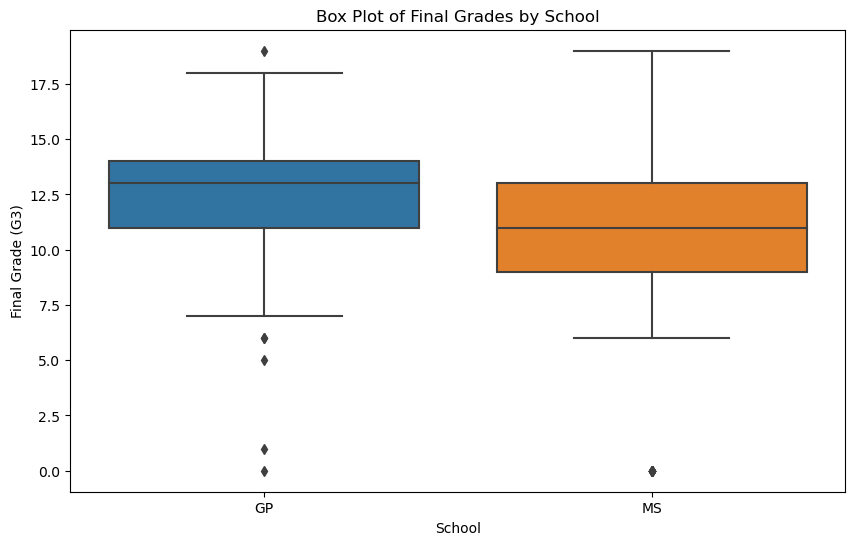

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='school', y='G3', data=df)
plt.title('Box Plot of Final Grades by School')
plt.xlabel('School')
plt.ylabel('Final Grade (G3)')
plt.show()


**Decision Tree Regressor with all Features**

-0.781367418988778
11.766871165644172


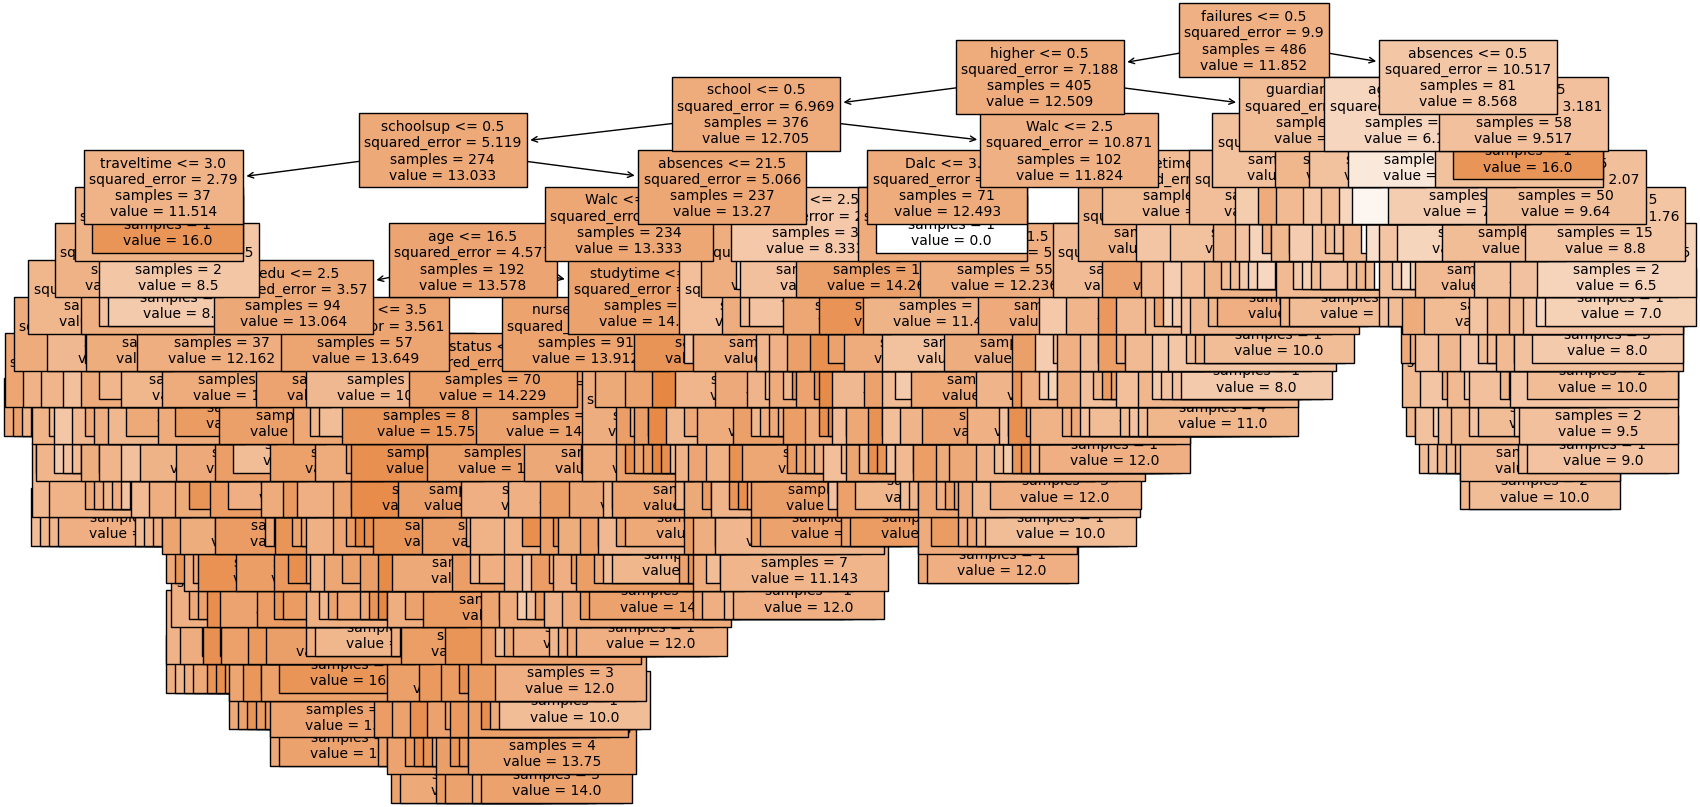

In [203]:
#Splitting Data

x = df.drop("G3", axis=1)
y = df["G3"]

#Training Data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

#Evaluation of Model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(score)

#Model Prediction
y_pred = model.predict(x_test)
print(sum(y_pred)/len(y_pred))

#Visualization
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True,feature_names=x.columns, fontsize=10)
plt.show()

- Score = -0.781367418988778
- Prediction = 11.766871165644172

**With 3 Selected Features**

-0.01444192224494878
11.851187310230635


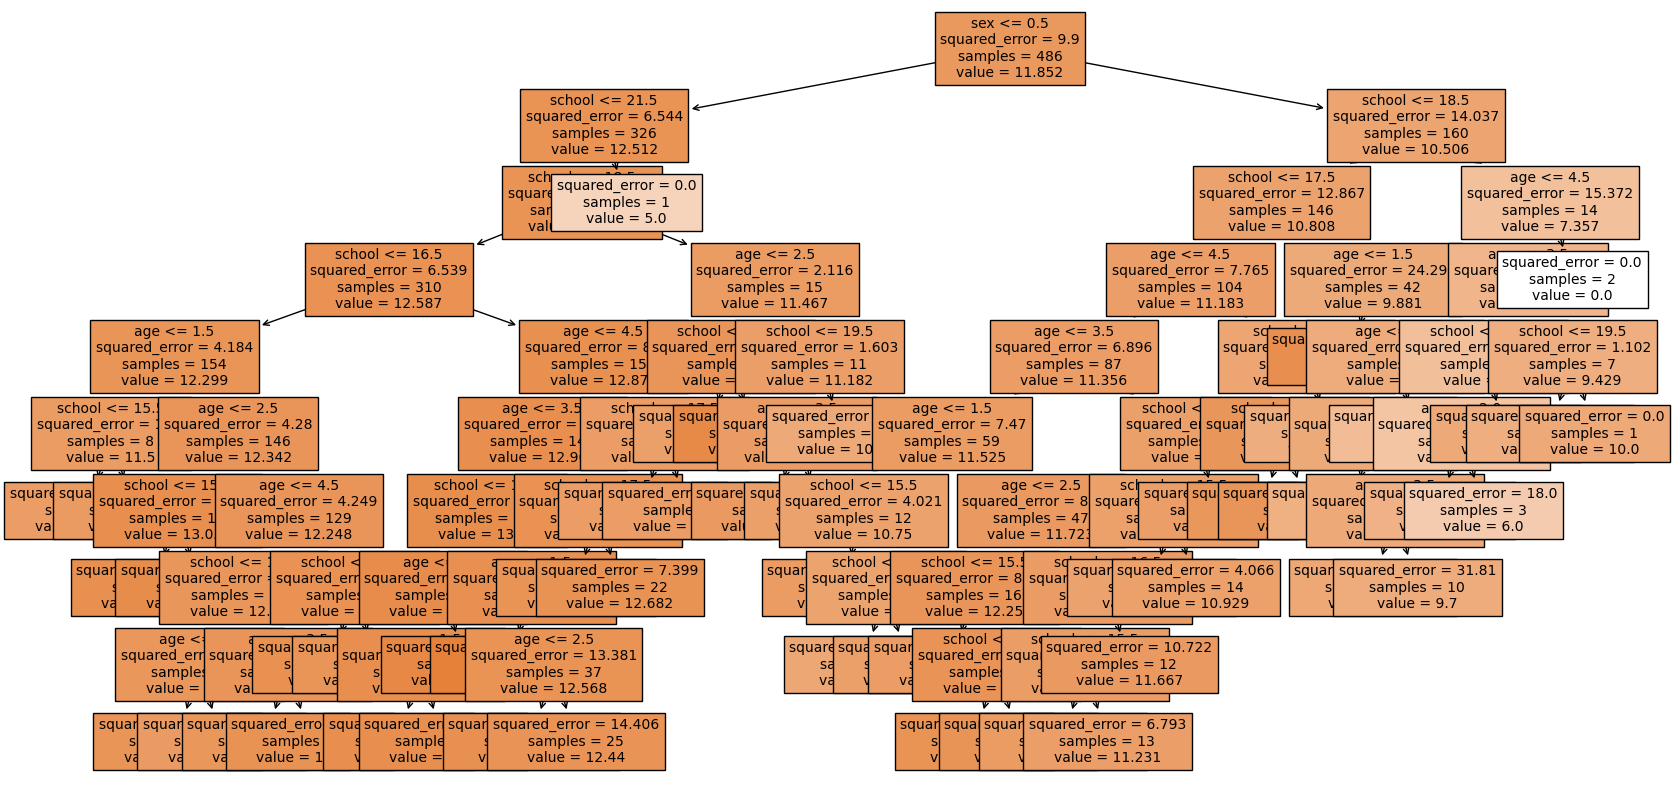

In [204]:
#Utilizing less inputs

inputvals = ['age', 'school', 'freetime']
X = df[inputvals]
Y = df["G3"]

#Training Data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

#Evaluation of Model
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print(score)

#Model Prediction
Y_pred = model.predict(X_test)
print(sum(Y_pred)/len(Y_pred))

#Visualization
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True,feature_names=x.columns, fontsize=10)
plt.show()

- Score = -0.01444192224494878
- Prediction = 11.851187310230635

**Summary**
From the above decision trees we can see that the hypothesis with more features indicates a stronger relationship with final grades leading it to predict a more accurate grade. This is because of the scores where 0.78 is closer to one than 0.014, indicating using all the features produces a better model for predicting the final grade. However, the scores are shown as negative and I don't know if that is wrong. 